In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load delta.csv and set Month and Year as index
df = pd.read_csv('delta.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))  # Combine Month and Year into Date
df.set_index('Date', inplace=True)
df.head()

,Month,Year,Number of Passengers (Millions)
Date,,,
2011-01-01,January,2011,12.4
2011-02-01,February,2011,11.2
2011-03-01,March,2011,14.9
2011-04-01,April,2011,13.8
2011-05-01,May,2011,15.3


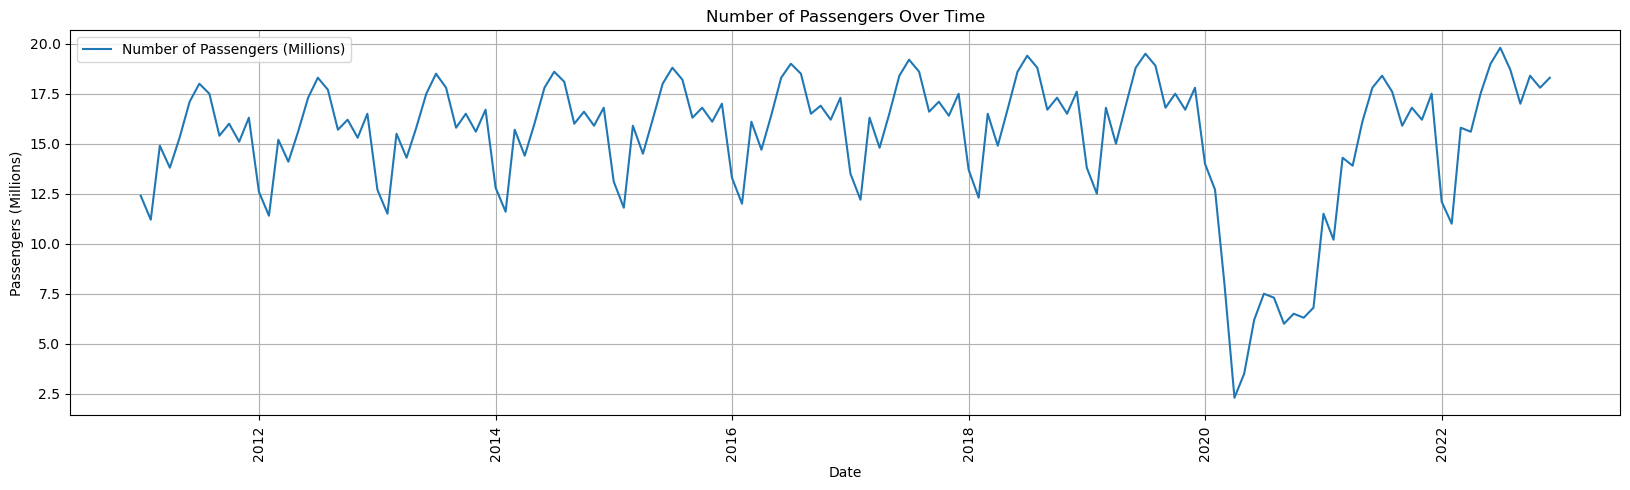

In [4]:
# Plot the passengers over time
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['Number of Passengers (Millions)'], label='Number of Passengers (Millions)')
plt.xlabel('Date')
plt.ylabel('Passengers (Millions)')
plt.title('Number of Passengers Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Perform seasonal decomposition
result = seasonal_decompose(df['Number of Passengers (Millions)'], model='multiplicative', period=12)


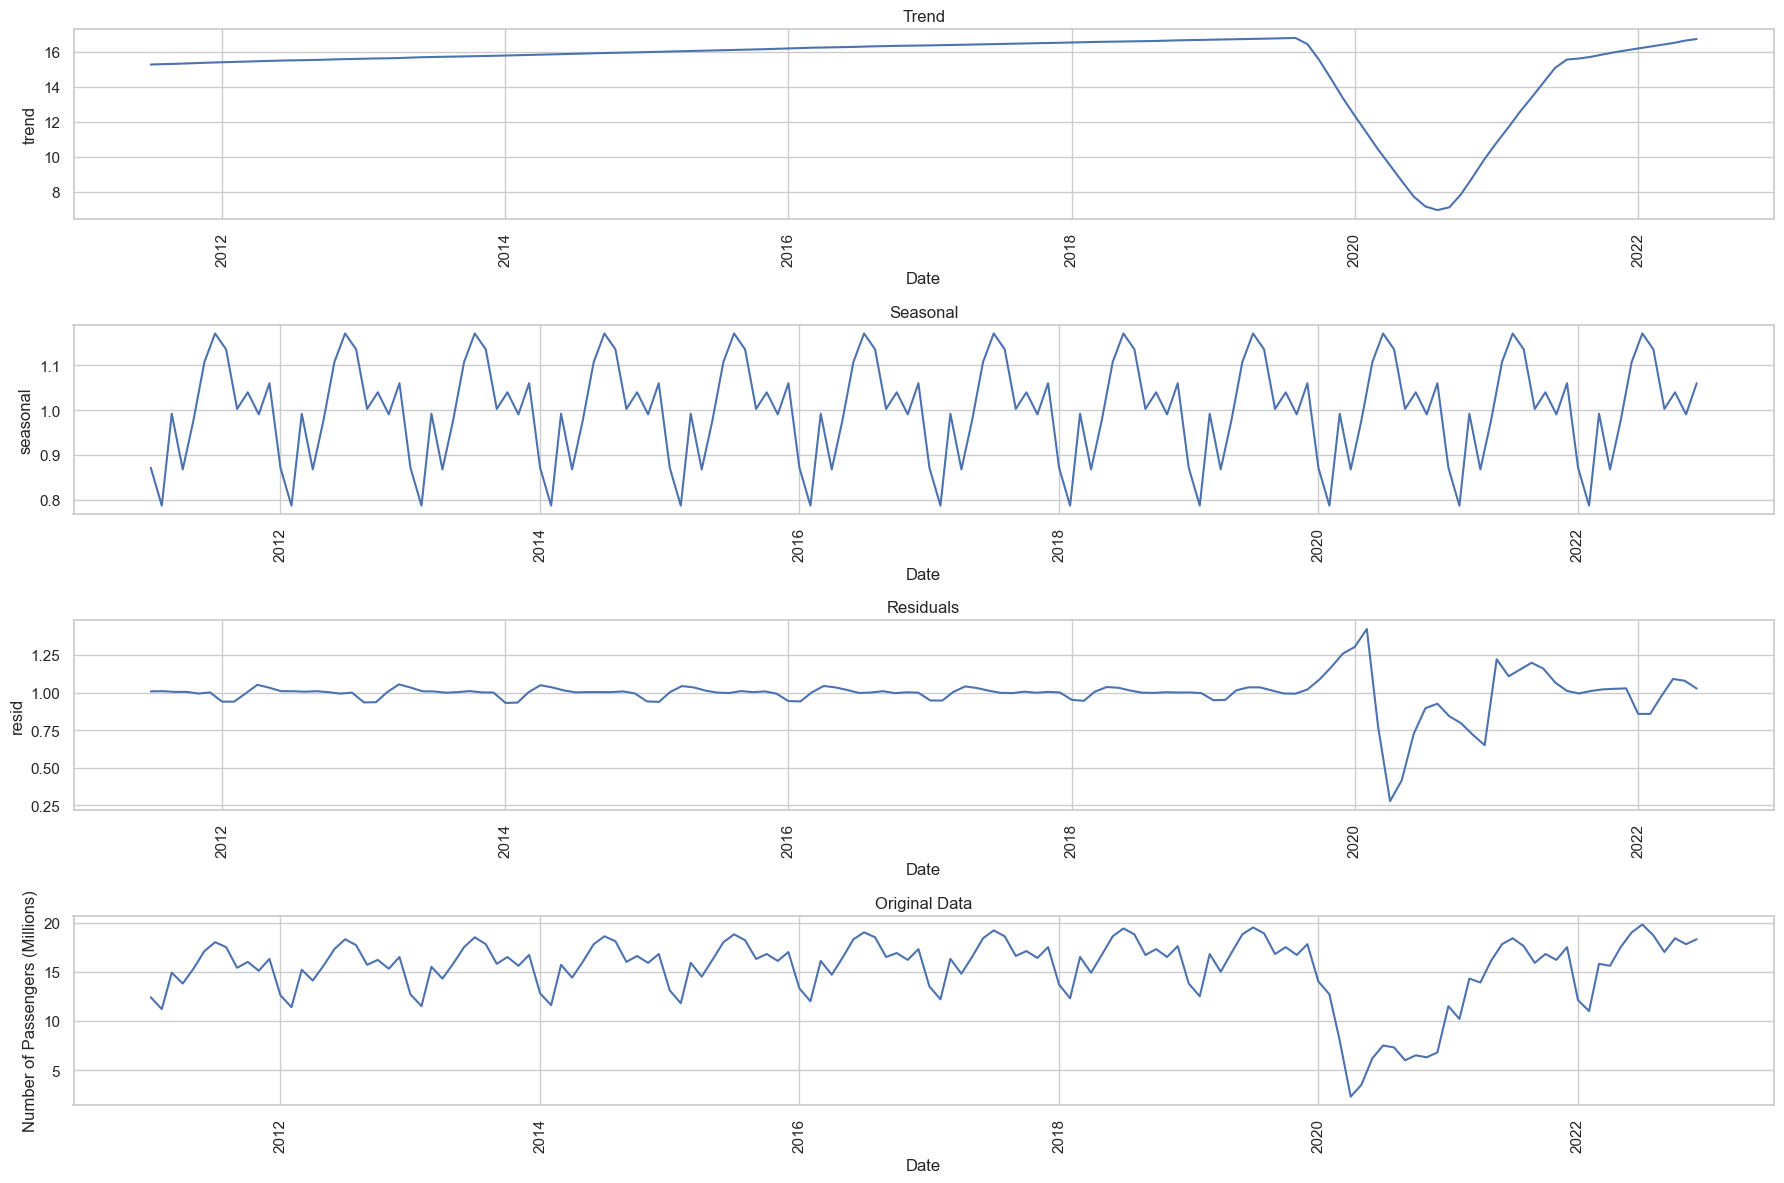

In [8]:
# Plot the components in the graph
sns.set(style='whitegrid')
plt.figure(figsize=(18,12))

# Trend component
plt.subplot(411)
sns.lineplot(data=result.trend)
plt.title('Trend')
plt.xticks(rotation=90)

# Seasonal component
plt.subplot(412)
sns.lineplot(data=result.seasonal)
plt.title('Seasonal')
plt.xticks(rotation=90)

# Residuals component
plt.subplot(413)
sns.lineplot(data=result.resid)
plt.title('Residuals')
plt.xticks(rotation=90)

# Original data
plt.subplot(414)
sns.lineplot(data=df['Number of Passengers (Millions)'])
plt.title('Original Data')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [9]:
seasonal_period = 12

In [10]:
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test

# Perform ADF test on the original data
result = adfuller(df['Number of Passengers (Millions)'], autolag='AIC') # Akaike Information Criterion
print('ADF Statistic (Original Data):', result[0])
print('p-value (Original Data):', result[1])

ADF Statistic (Original Data): -3.6811665133019775
p-value (Original Data): 0.004385999405994781


In [11]:
# Second-order differencing
result = adfuller(df['Number of Passengers (Millions)'].diff().diff().dropna(), autolag='AIC')
print('ADF Statistic (2nd Order Differencing):', result[0])
print('p-value (2nd Order Differencing):', result[1])

ADF Statistic (2nd Order Differencing): -5.608532506836004
p-value (2nd Order Differencing): 1.2184377496991947e-06


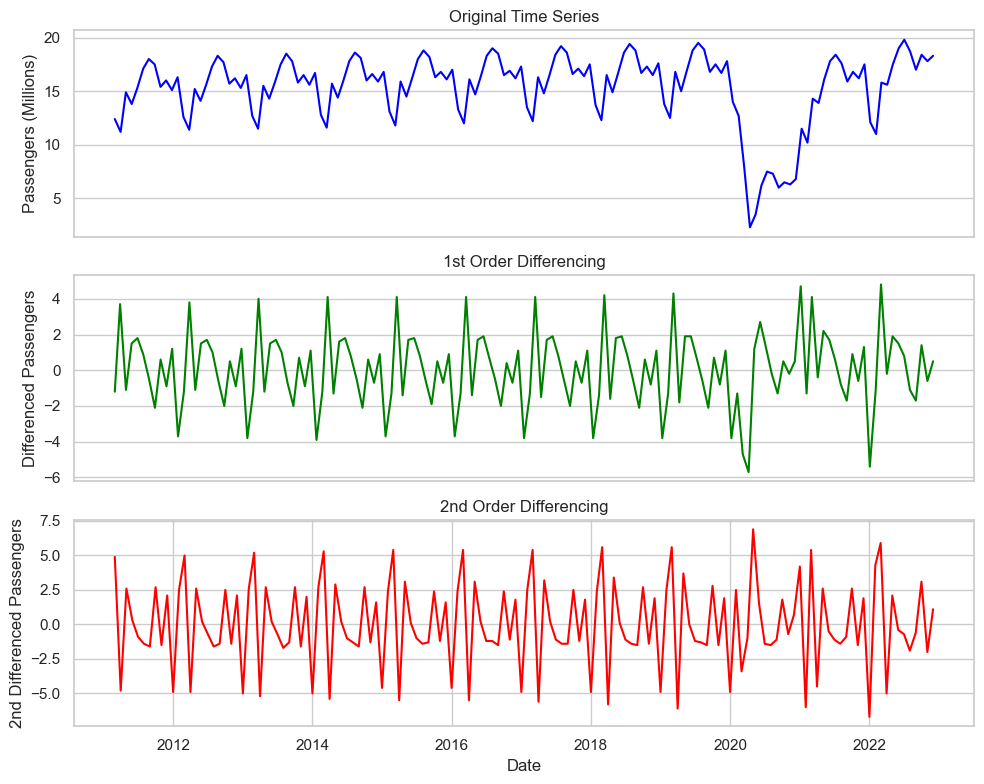

In [13]:
import matplotlib.pyplot as plt

# Plot the original time series, 1st order differencing, and 2nd order differencing
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 8))

# Original time series
ax1.plot(df.index, df['Number of Passengers (Millions)'], color='blue')
ax1.set_title('Original Time Series')
ax1.axes.xaxis.set_visible(False)  # Hide x-axis labels for clarity
ax1.set_ylabel('Passengers (Millions)')

# First-order differencing
ax2.plot(df.index, df['Number of Passengers (Millions)'].diff(), color='green')
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)  # Hide x-axis labels for clarity
ax2.set_ylabel('Differenced Passengers')

# Second-order differencing
ax3.plot(df.index, df['Number of Passengers (Millions)'].diff().diff(), color='red')
ax3.set_title('2nd Order Differencing')
ax3.set_xlabel('Date')
ax3.set_ylabel('2nd Differenced Passengers')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
# p = 0 # MA - Moving Average - PACF
# d = 1 # order of differencing - I
# q = 0 # AR - Auto Regressive - ACF

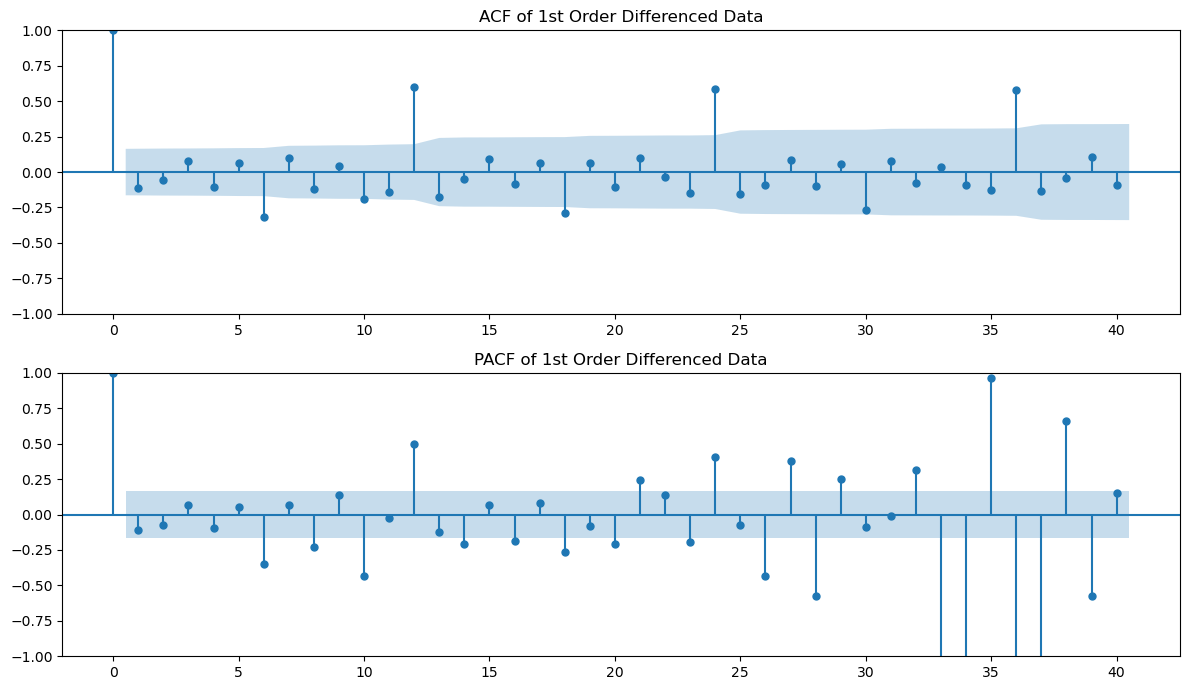

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load delta.csv and set up the data
df = pd.read_csv('delta.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.set_index('Date', inplace=True)

# Plot ACF and PACF for first-order differenced data
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# ACF plot
sm.graphics.tsa.plot_acf(df['Number of Passengers (Millions)'].diff().dropna(), lags=40, ax=ax[0])
ax[0].set_title('ACF of 1st Order Differenced Data')
# PACF plot
sm.graphics.tsa.plot_pacf(df['Number of Passengers (Millions)'].diff().dropna(), lags=40, ax=ax[1])
ax[1].set_title('PACF of 1st Order Differenced Data')
#ax[1].set_ylim(-2, 2)
plt.tight_layout()
plt.show()



In [15]:
p = 3 # pacf
d = 1 # 1st order difference
q = 3 # acf

In [16]:
P = 3
D = 0
Q = 3

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set the seasonal period (for monthly data with yearly seasonality, we use 12)
seasonal_period = 12

# Ensure no missing values in the differenced data
passenger_data = df['Number of Passengers (Millions)'].dropna()

# Define and fit the SARIMAX model
model = SARIMAX(passenger_data, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))
fitted_model = model.fit(disp=False)  # Set disp=False to prevent convergence messages from displaying

# Display the summary of the fitted model
print(fitted_model.summary())


                                         SARIMAX Results                                          
Dep. Variable:            Number of Passengers (Millions)   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood                -237.080
Date:                                    Wed, 06 Nov 2024   AIC                            492.160
Time:                                            21:32:09   BIC                            518.825
Sample:                                        01-01-2011   HQIC                           502.995
                                             - 12-01-2022                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0398      1.456      0.027      0

In [28]:
# Forecast for the next 2 years (24 months)
forecast_steps = 24
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean  # Extract forecasted values

# Create the date range for the forecasted values, starting one month after the last date in the original data
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Combine forecast values and date range into a DataFrame for easy plotting
forecast_df = pd.DataFrame({'Forecasted Passengers (Millions)': forecast_values}, index=forecast_index)


In [24]:
# create a forecast dataframe
forecast_df = pd.DataFrame({
    "Forecast": list(forecast.predicted_mean),
    "Lower CI": list(forecast.conf_int().iloc[:, 0]),
    "Upper CI": list(forecast.conf_int().iloc[:, 1])
}, index=forecast_index)

forecast_df.head()

,Forecast,Lower CI,Upper CI
2023-01-31,15.188550,12.932337,17.444763
2023-02-28,13.930576,10.450435,17.410716
2023-03-31,14.621367,10.237816,19.004919
2023-04-30,11.594346,6.463752,16.724940
2023-05-31,13.124201,7.342281,18.906121


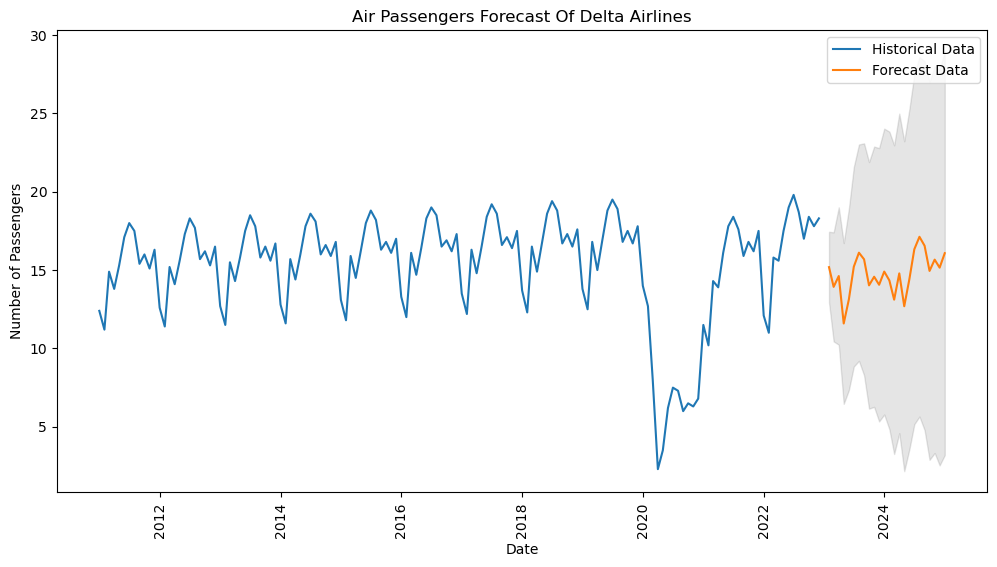

In [27]:
# plot the forecast values

plt.figure(figsize=(12, 6))
plt.plot(df['Number of Passengers (Millions)'], label='Historical Data')
plt.plot(forecast_df['Forecast'], label='Forecast Data')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Forecast Of Delta Airlines')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('delta.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.set_index('Date', inplace=True)

# Shift data by a small constant to avoid log of zero or negative values
df['Adjusted_Passengers'] = df['Number of Passengers (Millions)'] + 1  # Adding a small constant

# Apply log transformation to the adjusted data
df['Log_Passengers'] = np.log(df['Adjusted_Passengers'])

# Split data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Log_Passengers'][:train_size], df['Log_Passengers'][train_size:]

# Define SARIMA order parameters
p, d, q = 1, 1, 1  # AR, I, MA orders
P, D, Q, seasonal_period = 1, 0, 1, 12  # Seasonal orders and period

# Fit SARIMA model on training data
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period), 
                enforce_stationarity=False, enforce_invertibility=False)
sarima_model = model.fit(disp=False)

# Forecast the test set
forecast_log = sarima_model.forecast(steps=len(test))

# Convert forecast back to original scale (adjusted data)
forecast_original_scale = np.exp(forecast_log) - 1  # Subtract the constant after inverse transformation
test_original_scale = np.exp(test) - 1  # Transform actuals back to original scale

# Calculate accuracy metrics
mae = mean_absolute_error(test_original_scale, forecast_original_scale)
mse = mean_squared_error(test_original_scale, forecast_original_scale)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_original_scale - forecast_original_scale) / test_original_scale)) * 100  # percentage error

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')


# Output comparison for inspection
comparison_df = pd.DataFrame({
    'Actual': test_original_scale,
    'Forecast': forecast_original_scale
})
print(comparison_df)


MAE: 12.36
MSE: 190.35
RMSE: 13.80
MAPE: 77.32%
            Actual  Forecast
2020-08-01     7.3  8.527760
2020-09-01     6.0  7.498708
2020-10-01     6.5  7.863373
2020-11-01     6.3  7.458549
2020-12-01     6.8  8.017724
2021-01-01    11.5  6.095386
2021-02-01    10.2  5.442512
2021-03-01    14.3  2.603820
2021-04-01    13.9  0.043541
2021-05-01    16.1  0.507561
2021-06-01    17.8  1.668441
2021-07-01    18.4  2.265718
2021-08-01    17.6  2.790737
2021-09-01    15.9  2.354738
2021-10-01    16.8  2.509869
2021-11-01    16.2  2.337763
2021-12-01    17.5  2.575650
2022-01-01    12.1  1.762962
2022-02-01    11.0  1.490519
2022-03-01    15.8  0.333382
2022-04-01    15.6 -0.648381
2022-05-01    17.5 -0.477727
2022-06-01    19.0 -0.034842
2022-07-01    19.8  0.199335
2022-08-01    18.7  0.407903
2022-09-01    17.0  0.234531
2022-10-01    18.4  0.296034
2022-11-01    17.8  0.227814
2022-12-01    18.3  0.322175


Year Range 2011-2017:
MAE: 0.04
MSE: 0.00
RMSE: 0.05
MAPE: 0.27%


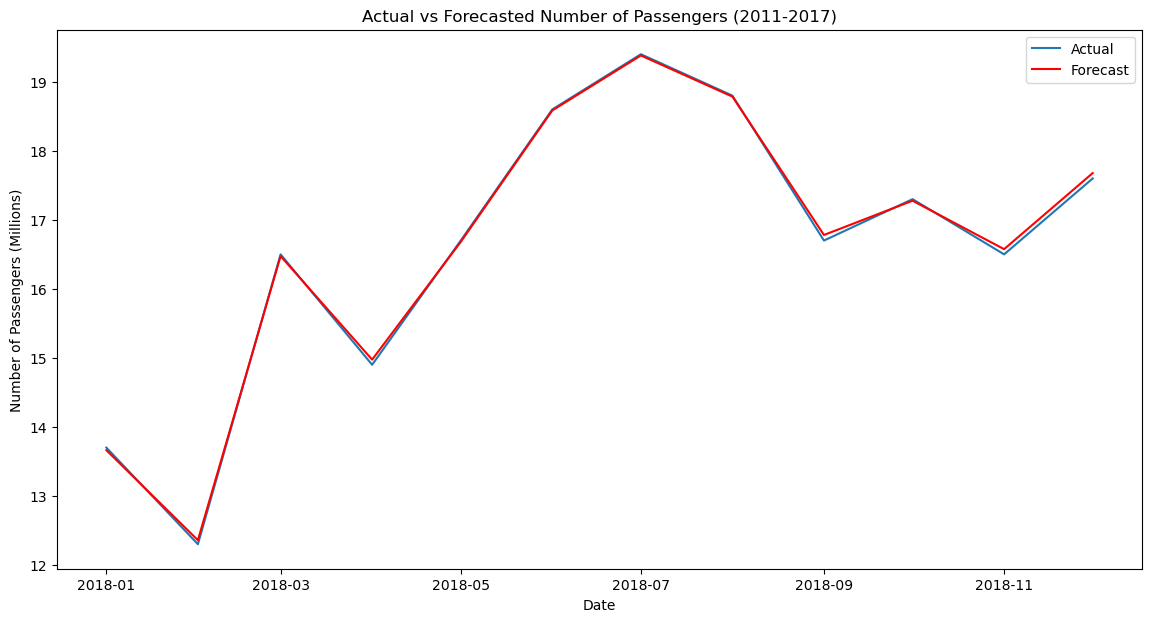

Year Range 2013-2017:
MAE: 0.05
MSE: 0.00
RMSE: 0.07
MAPE: 0.32%


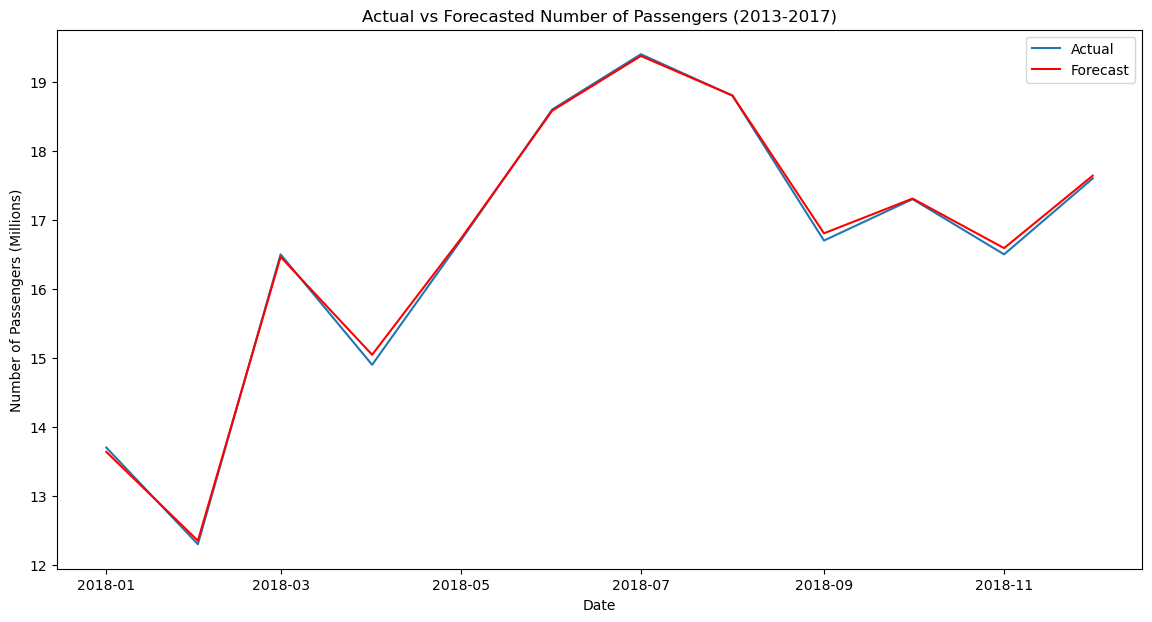

Year Range 2015-2017:
MAE: 0.06
MSE: 0.01
RMSE: 0.07
MAPE: 0.37%


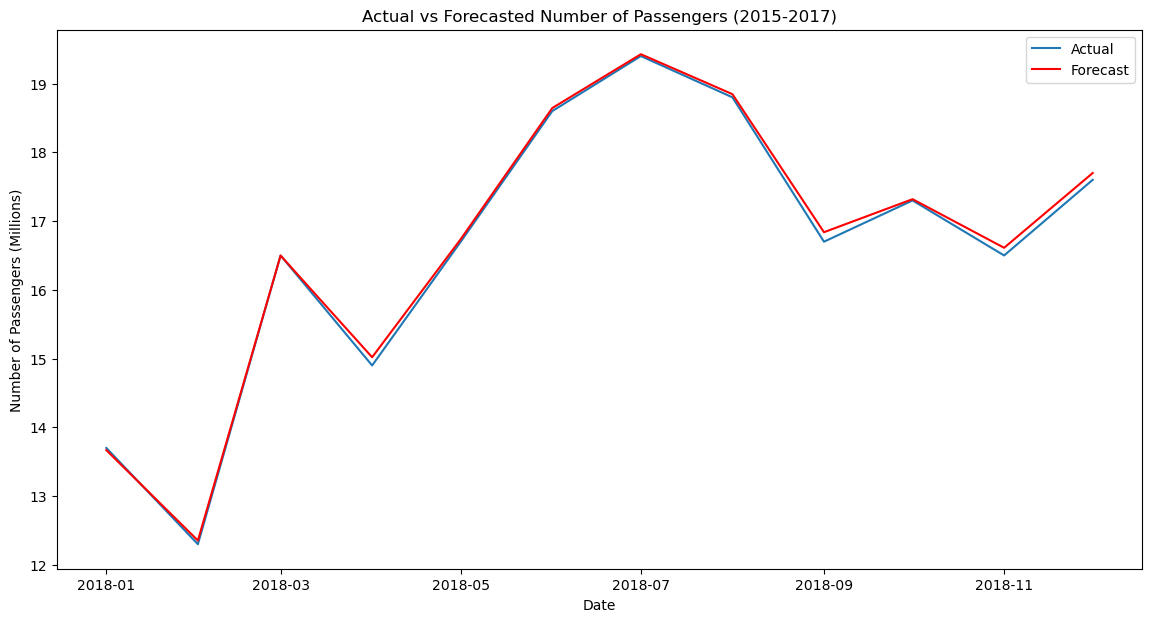

Year Range 2017-2021:
MAE: 1.43
MSE: 6.25
RMSE: 2.50
MAPE: 11.11%


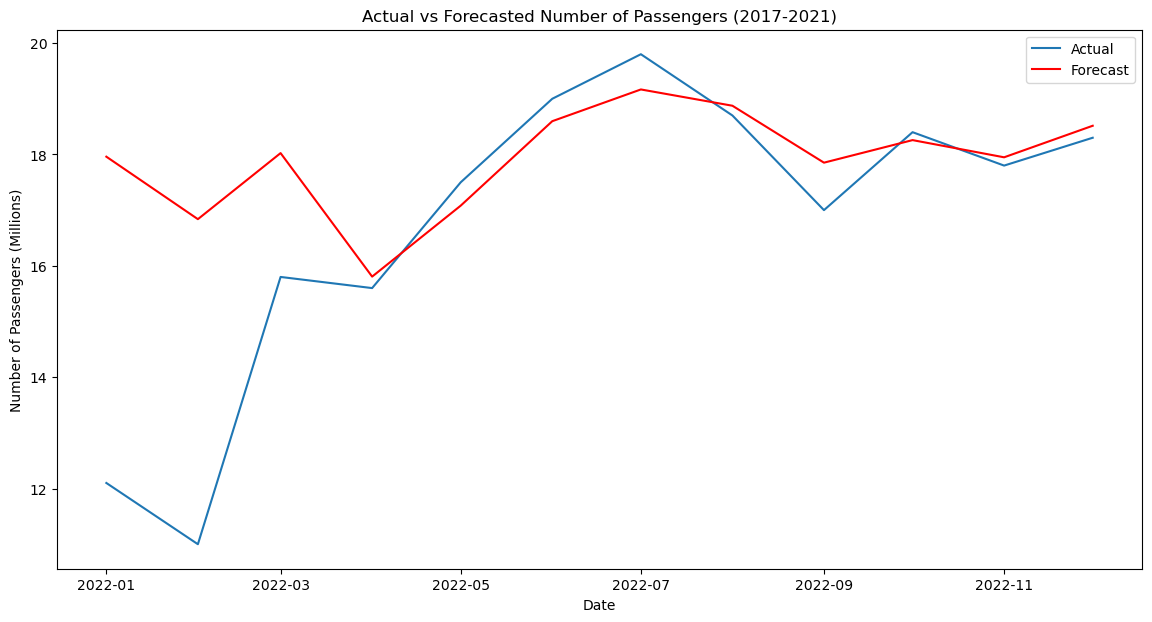

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('delta.csv')

# Combine 'Month' and 'Year' into a 'Date' column and set as index
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.set_index('Date', inplace=True)

# Shift data by a small constant to avoid log of zero or negative values
df['Adjusted_Passengers'] = df['Number of Passengers (Millions)'] + 1  # Adding a small constant

# Apply log transformation to the adjusted data
df['Log_Passengers'] = np.log(df['Adjusted_Passengers'])

# Define function to train-test on specific years
def train_test_on_years(start_year, end_year, test_periods):
    # Filter data for training years
    train_data = df[str(start_year):str(end_year)]['Log_Passengers']
    
    # Test data for the next period
    test_data = df[test_periods]['Log_Passengers']
    
    # Split data into train and test sets
    train, test = train_data, test_data
    
    # Define SARIMA order parameters
    p, d, q = 1, 1, 1  # AR, I, MA orders
    P, D, Q, seasonal_period = 1, 0, 1, 12  # Seasonal orders and period

    # Fit SARIMA model on training data
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period), 
                    enforce_stationarity=False, enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Forecast the test set
    forecast_log = sarima_model.forecast(steps=len(test))
    
    # Convert forecast back to original scale (adjusted data)
    forecast_original_scale = np.exp(forecast_log) - 1  # Subtract the constant after inverse transformation
    test_original_scale = np.exp(test) - 1  # Transform actuals back to original scale

    # Calculate accuracy metrics
    mae = mean_absolute_error(test_original_scale, forecast_original_scale)
    mse = mean_squared_error(test_original_scale, forecast_original_scale)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test_original_scale - forecast_original_scale) / test_original_scale)) * 100  # percentage error

    print(f'Year Range {start_year}-{end_year}:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')

    # Plot actual vs. forecast
    plt.figure(figsize=(14, 7))
    plt.plot(test.index, test_original_scale, label='Actual')
    plt.plot(test.index, forecast_original_scale, label='Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers (Millions)')
    plt.title(f'Actual vs Forecasted Number of Passengers ({start_year}-{end_year})')
    plt.legend()
    plt.show()

# Call function for different year ranges
train_test_on_years(2011, 2017, '2018')
train_test_on_years(2013, 2017, '2018')
train_test_on_years(2015, 2017, '2018')

# New function call for 2017-2021 forecast
train_test_on_years(2017, 2021, '2022')


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('delta.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.set_index('Date', inplace=True)

# Define the SARIMA parameters (adjust as needed based on previous analysis)
p, d, q = 1, 1, 1  # AR, I, MA orders
P, D, Q, seasonal_period = 1, 0, 1, 12  # Seasonal orders and period

# Function to calculate accuracy metrics
def calculate_accuracy_metrics(test, forecast):
    # Ensure that both test and forecast have the same index
    if not test.index.equals(forecast.index):
        forecast = forecast.reindex(test.index)
    
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Handle division by zero in MAPE calculation
    valid_indices = test != 0  # Ensure no zero actual values
    mape = np.mean(np.abs((test[valid_indices] - forecast[valid_indices]) / test[valid_indices])) * 100 if np.any(valid_indices) else np.nan

    return mae, mse, rmse, mape

# Function to train the SARIMA model and make forecasts
def train_and_forecast(train, test):
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period), 
                    enforce_stationarity=False, enforce_invertibility=False)
    sarima_model = model.fit(disp=False)
    forecast = sarima_model.forecast(steps=len(test))
    return forecast

# Function to train and test on a specific period
def train_test_on_years(start_year_train, end_year_train, test_year):
    # Split the data into train and test sets
    train_data = df[(df.index.year >= start_year_train) & (df.index.year <= end_year_train)]
    test_data = df[df.index.year == int(test_year)]

    # Ensure the Log_Passengers column exists
    train = train_data['Log_Passengers']
    test = test_data['Log_Passengers']

    # Forecast using SARIMA model
    forecast = train_and_forecast(train, test)

    # Calculate accuracy metrics
    mae, mse, rmse, mape = calculate_accuracy_metrics(test, forecast)

    # Print the results
    print(f"Training from {start_year_train} to {end_year_train}, Testing on {test_year}:")
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print('-' * 50)

# Apply Log transformation to stabilize variance
df['Adjusted_Passengers'] = df['Number of Passengers (Millions)'] + 1  # Adding a small constant
df['Log_Passengers'] = np.log(df['Adjusted_Passengers'])

# Train and test for different periods
train_test_on_years(2011, 2017, '2018')
train_test_on_years(2013, 2017, '2018')
train_test_on_years(2015, 2017, '2018')

# New function call for 2017-2021 forecast
train_test_on_years(2017, 2021, '2022')


Training from 2011 to 2017, Testing on 2018:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
MAPE: 0.09%
--------------------------------------------------
Training from 2013 to 2017, Testing on 2018:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
MAPE: 0.11%
--------------------------------------------------
Training from 2015 to 2017, Testing on 2018:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
MAPE: 0.12%
--------------------------------------------------
Training from 2017 to 2021, Testing on 2022:
MAE: 0.09
MSE: 0.03
RMSE: 0.16
MAPE: 3.37%
--------------------------------------------------
